## University Students Clustering in America

### Import Library

In [1]:
# for basic mathematics operation 
import numpy as np
import pandas as pd

# for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

# To perform Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### Reading Dataset

In [2]:
data = pd.read_csv("College_Data.csv")
data

,College,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,Worcester State College,2197,1515,543,4,26,3089,2029,6797,3900,500,1200,60,60,21.0,14,4469,40
773,Xavier University,1959,1805,695,24,47,2849,1107,11520,4960,600,1250,73,75,13.3,31,9189,83
774,Xavier University of Louisiana,2097,1915,695,34,61,2793,166,6900,4200,617,781,67,75,14.4,20,8323,49
775,Yale University,10705,2453,1317,95,99,5217,83,19840,6510,630,2115,96,96,5.8,49,40386,99


In [3]:
data.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


In [4]:
data.isnull().sum()

College        0
Apps           0
Accept         0
Enroll         0
Top10perc      0
Top25perc      0
F.Undergrad    0
P.Undergrad    0
Outstate       0
Room.Board     0
Books          0
Personal       0
PhD            0
Terminal       0
S.F.Ratio      0
perc.alumni    0
Expend         0
Grad.Rate      0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   College      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: float64(1), int64(16), object(1)
memory usage: 

## Principal Component Analysis

### Scaling the Data

In [6]:
##Copy Data
data2=data.copy()

In [7]:
# Import the StandardScaler()
from sklearn.preprocessing import StandardScaler

# Create a scaling object
scaler = StandardScaler()

# Create a list of the variables that you need to scale
varlist = ['Apps', 'Accept', 'Enroll', 'Top10perc', 'Top25perc', 'F.Undergrad', 'P.Undergrad', 'Outstate', 'Room.Board', 
           'Books', 'Personal', 'PhD', 'Terminal', 'S.F.Ratio', 'perc.alumni', 'Expend', 'Grad.Rate']
# Scale these variables using 'fit_transform'
data[varlist] = scaler.fit_transform(data[varlist])

### PCA on the Data

In [8]:
# Putting feature variable to X
X = data.drop(['College'],axis=1)

# Putting COLLEGE
college = data['College']

In [9]:
#Improting the PCA module
from sklearn.decomposition import PCA
pca = PCA(random_state=42)

In [10]:
#Doing the PCA on the train data
pca.fit(X)

PCA(random_state=42)

### PCA Components or Weight

In [11]:
pca.components_

array([[ 2.48765602e-01,  2.07601502e-01,  1.76303592e-01,
         3.54273947e-01,  3.44001279e-01,  1.54640962e-01,
         2.64425045e-02,  2.94736419e-01,  2.49030449e-01,
         6.47575181e-02, -4.25285386e-02,  3.18312875e-01,
         3.17056016e-01, -1.76957895e-01,  2.05082369e-01,
         3.18908750e-01,  2.52315654e-01],
       [ 3.31598227e-01,  3.72116750e-01,  4.03724252e-01,
        -8.24118211e-02, -4.47786551e-02,  4.17673774e-01,
         3.15087830e-01, -2.49643522e-01, -1.37808883e-01,
         5.63418434e-02,  2.19929218e-01,  5.83113174e-02,
         4.64294477e-02,  2.46665277e-01, -2.46595274e-01,
        -1.31689865e-01, -1.69240532e-01],
       [-6.30921033e-02, -1.01249056e-01, -8.29855709e-02,
         3.50555339e-02, -2.41479376e-02, -6.13929764e-02,
         1.39681716e-01,  4.65988731e-02,  1.48967389e-01,
         6.77411649e-01,  4.99721120e-01, -1.27028371e-01,
        -6.60375454e-02, -2.89848401e-01, -1.46989274e-01,
         2.26743985e-01, -2.0

In [12]:
colnames = list(X.columns)
pcs_df = pd.DataFrame({'Feature':colnames, 'PC1':pca.components_[0], 'PC2':pca.components_[1], 'PC3':pca.components_[2], 
                       'PC4':pca.components_[3], 'PC5':pca.components_[4], 'PC6':pca.components_[5], 
                       'PC7':pca.components_[6], 'PC8':pca.components_[7], 'PC9':pca.components_[8], 
                       'PC10':pca.components_[9], 'PC11':pca.components_[10], 'PC12':pca.components_[11], 
                       'PC13':pca.components_[12], 'PC14':pca.components_[13], 'PC15':pca.components_[14], 
                       'PC16':pca.components_[15], 'PC17':pca.components_[16]})
pcs_df

,Feature,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17
0,Apps,0.248766,0.331598,-0.063092,0.281311,0.005741,-0.016237,-0.042486,-0.103090,-0.090227,0.052510,0.043046,0.024071,0.595831,0.080633,0.133406,0.459139,0.358970
1,Accept,0.207602,0.372117,-0.101249,0.267817,0.055786,0.007535,-0.012950,-0.056271,-0.177865,0.041140,-0.058406,-0.145102,0.292642,0.033467,-0.145498,-0.518569,-0.543427
2,Enroll,0.176304,0.403724,-0.082986,0.161827,-0.055694,-0.042558,-0.027693,0.058662,-0.128561,0.034488,-0.069399,0.011143,-0.444638,-0.085697,0.029590,-0.404318,0.609651
3,Top10perc,0.354274,-0.082412,0.035056,-0.051547,-0.395434,-0.052693,-0.161332,-0.122678,0.341100,0.064026,-0.008105,0.038554,0.001023,-0.107828,0.697723,-0.148739,-0.144986
4,Top25perc,0.344001,-0.044779,-0.024148,-0.109767,-0.426534,0.033092,-0.118486,-0.102492,0.403712,0.014549,-0.273128,-0.089352,0.021884,0.151742,-0.617275,0.051868,0.080348
5,F.Undergrad,0.154641,0.417674,-0.061393,0.100412,-0.043454,-0.043454,-0.025076,0.078890,-0.059442,0.020847,-0.081158,0.056177,-0.523622,-0.056373,0.009916,0.560363,-0.414705
6,P.Undergrad,0.026443,0.315088,0.139682,-0.158558,0.302385,-0.191199,0.061042,0.570784,0.560673,-0.223106,0.100693,-0.063536,0.125998,0.019286,0.020952,-0.052731,0.009018
7,Outstate,0.294736,-0.249644,0.046599,0.131291,0.222532,-0.030000,0.108529,0.009846,-0.004573,0.186675,0.143221,-0.823444,-0.141856,-0.034012,0.038354,0.101595,0.050900
8,Room.Board,0.249030,-0.137809,0.148967,0.184996,0.560919,0.162755,0.209744,-0.221453,0.275023,0.298324,-0.359322,0.354560,-0.069749,-0.058429,0.003402,-0.025929,0.001146
9,Books,0.064758,0.056342,0.677412,0.087089,-0.127289,0.641055,-0.149692,0.213293,-0.133663,-0.082029,0.031940,-0.028159,0.011438,-0.066849,-0.009439,0.002883,0.000773


### Choose Number of PC

In [13]:
#Eigenvalue
pca.explained_variance_

array([5.45052162, 4.48360686, 1.17466761, 1.00820573, 0.93423123,
       0.84849117, 0.6057878 , 0.58787222, 0.53061262, 0.4043029 ,
       0.31344588, 0.22061096, 0.16779415, 0.1439785 , 0.08802464,
       0.03672545, 0.02302787])

In [14]:
#Proportion
pca.explained_variance_ratio_

array([0.32020628, 0.26340214, 0.06900917, 0.05922989, 0.05488405,
       0.04984701, 0.03558871, 0.03453621, 0.03117234, 0.02375192,
       0.01841426, 0.01296041, 0.00985754, 0.00845842, 0.00517126,
       0.00215754, 0.00135284])

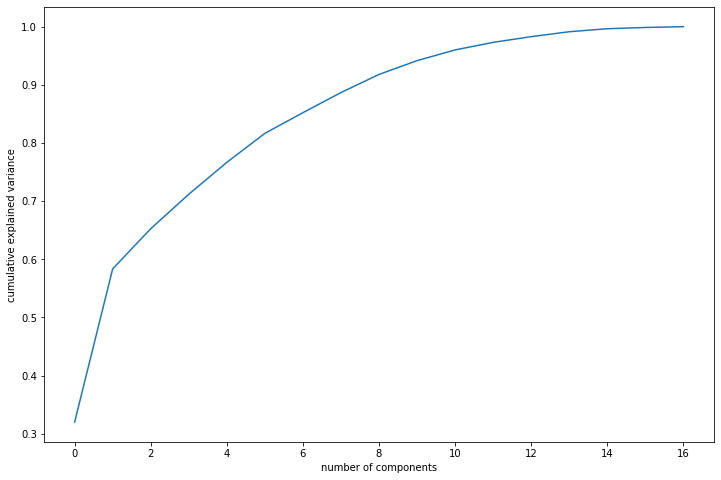

In [15]:
#Making the screeplot - plotting the cumulative variance against the number of components
plt.figure(figsize = (12,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

#### Looks like 4 components are enough to describe >75% of the variance in the dataset
We'll choose 4 components for our modeling

In [16]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets
pca_final= PCA(n_components=4,random_state=42)

#### Basis Transformation

In [17]:
df_pca = pca_final.fit_transform(X)

In [18]:
df_pca = pd.DataFrame(df_pca)
df_pca.head()

,0,1,2,3
0,-1.592855,0.767334,-0.101074,-0.921749
1,-2.192402,-0.578830,2.278801,3.588922
2,-1.430964,-1.092819,-0.438093,0.677240
3,2.855557,-2.630612,0.141720,-1.295488
4,-2.212008,0.021631,2.387023,-1.114547


#### Correlation Analysis

<AxesSubplot:>

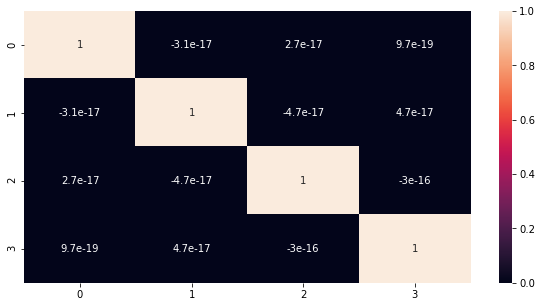

In [19]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (10,5))
sns.heatmap(df_pca.corr(),annot = True)

## Hierarchial Clustering

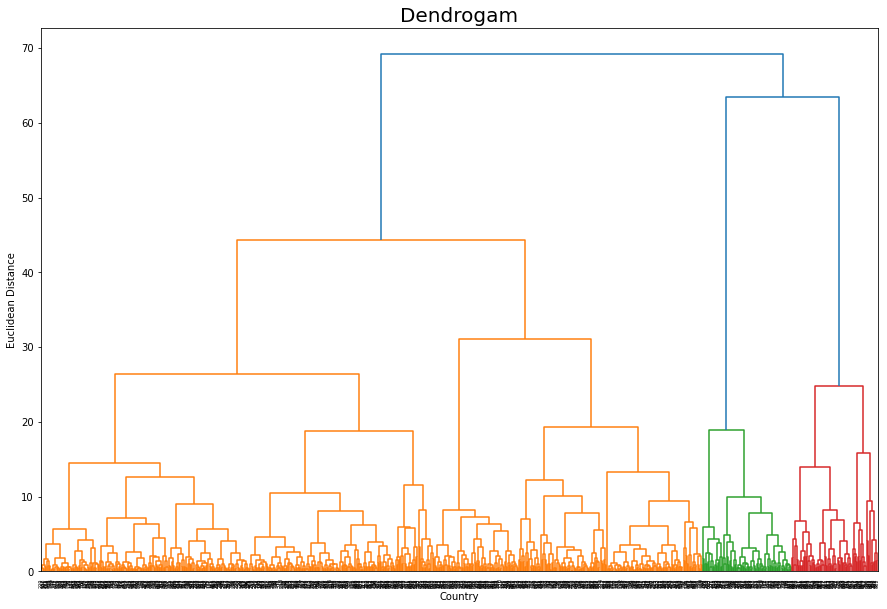

In [20]:
plt.figure(figsize=(15,10))
cluster=linkage(df_pca, method = 'ward',metric='euclidean')
dendrogram = dendrogram(cluster)
plt.title('Dendrogam', fontsize = 20)
plt.xlabel('Country')
plt.ylabel('Euclidean Distance')
plt.show()

Looking at the dedrogram it is observed that cutting it at n = 3 is most optimum.

In [30]:
#Modeling Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
cluster_hc = hc.fit_predict(df_pca)

In [31]:
#Add cluster result to Dataframe
df_pca['cluster']=cluster_hc

In [32]:
#Merge Country and Cluster
pca_cluster_hc = pd.concat([data['College'],df_pca['cluster']], axis=1, join='outer')
pca_cluster_hc.head()

,College,cluster
0,Abilene Christian University,0
1,Adelphi University,0
2,Adrian College,0
3,Agnes Scott College,2
4,Alaska Pacific University,0


In [33]:
#Merge to Original Data
clustered_data_hc = pca_cluster_hc.merge(data2, on = 'College')
clustered_data_hc.head()

,College,cluster,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,Abilene Christian University,0,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
1,Adelphi University,0,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
2,Adrian College,0,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
3,Agnes Scott College,2,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
4,Alaska Pacific University,0,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


In [34]:
#See Characteristic of Cluster in each variables
hasil=clustered_data_hc.groupby(['cluster']).agg({"Apps":"mean","Accept":"mean","Enroll":"mean",
                                                 "Top10perc":"mean","Top25perc":"mean","F.Undergrad":"mean",
                                                 "P.Undergrad":"mean","Outstate":"mean","Room.Board":"mean", 
                                                 "Books":"mean", "Personal":"mean", "PhD":"mean", "Terminal":"mean", 
                                                 "S.F.Ratio":"mean", "perc.alumni":"mean", "Expend":"mean", 
                                                 "Grad.Rate":"mean"}).reset_index()
hasil

,cluster,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
0,0,1761.456026,1284.786645,498.276873,22.545603,50.732899,2261.956026,605.850163,9730.599349,4195.820847,535.820847,1308.604235,68.563518,76.182410,14.414332,21.460912,8303.956026,63.534202
1,1,10800.062500,7402.625000,2984.650000,32.887500,63.612500,15602.675000,3460.787500,8374.225000,4196.300000,604.250000,1947.387500,84.475000,90.000000,16.271250,15.625000,9679.475000,59.525000
2,2,4659.445783,2259.542169,738.855422,59.506024,85.722892,2864.734940,189.301205,17685.228916,5709.156627,596.807229,992.831325,91.578313,95.819277,9.585542,39.096386,19674.289157,85.457831


In [35]:
clustered_data_hc[clustered_data_hc.cluster == 0].College.values

array(['Abilene Christian University', 'Adelphi University',
       'Adrian College', 'Alaska Pacific University', 'Albertson College',
       'Albertus Magnus College', 'Albion College', 'Albright College',
       'Alderson-Broaddus College', 'Alfred University',
       'Allegheny College', 'Allentown Coll. of St. Francis de Sales',
       'Alma College', 'Alverno College',
       'American International College', 'Anderson University',
       'Andrews University', 'Angelo State University',
       'Antioch University', 'Appalachian State University',
       'Aquinas College', 'Arkansas College (Lyon College)',
       'Arkansas Tech University', 'Assumption College',
       'Augsburg College', 'Augustana College IL', 'Augustana College',
       'Austin College', 'Averett College', 'Baker University',
       'Baldwin-Wallace College', 'Barat College', 'Barry University',
       'Baylor University', 'Beaver College', 'Bellarmine College',
       'Belmont Abbey College', 'Belmont Univers

In [36]:
clustered_data_hc[clustered_data_hc.cluster == 1].College.values

array(['Arizona State University Main campus',
       'Auburn University-Main Campus', 'Boston University',
       'Bowling Green State University',
       'Brigham Young University at Provo',
       'California Polytechnic-San Luis', 'Clemson University',
       'Colorado State University', 'East Carolina University',
       'Florida International University', 'Florida State University',
       'Georgia Institute of Technology', 'Georgia State University',
       'Illinois State University', 'Indiana State University',
       'Indiana University at Bloomington', 'Iowa State University',
       'Kansas State University',
       'Louisiana State University at Baton Rouge',
       'Miami University at Oxford', 'Michigan State University',
       'New York University',
       'North Carolina State University at Raleigh',
       'Northeastern University', 'Northern Arizona University',
       'Northern Illinois University', 'Ohio University',
       'Oklahoma State University',
       'Pen

In [37]:
clustered_data_hc[clustered_data_hc.cluster == 2].College.values

array(['Agnes Scott College', 'Amherst College', 'Bard College',
       'Barnard College', 'Bowdoin College', 'Brandeis University',
       'Brown University', 'Bryn Mawr College', 'Bucknell University',
       'Carleton College', 'Carnegie Mellon University',
       'Case Western Reserve University', 'Centre College',
       'Claremont McKenna College', 'Colby College', 'Colgate University',
       'College of the Holy Cross', 'College of William and Mary',
       'Colorado College', 'Columbia University', 'Connecticut College',
       'Dartmouth College', 'Davidson College', 'Dickinson College',
       'Drew University', 'Duke University', 'Emory University',
       'George Washington University', 'Georgetown University',
       'Gettysburg College', 'Goucher College', 'Grinnell College',
       'Hamilton College', 'Harvard University', 'Harvey Mudd College',
       'Hobart and William Smith Colleges', 'Johns Hopkins University',
       'Kenyon College', 'Lafayette College', 'Lawrenc

## Interpretation

Cluster 0 : Private College/City College<br>
Cluster 1 : Public College/State College<br>
Cluster 2 : Ivy League/Exclusive College<br>

Cluster 0 : Less Favourite College, Less Favoured by Top Highschool Students, Have the Less Fulltime Student <br>&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;&nbsp;Have Fair Parttime Student, Fair Student Expenses, Have Low Excellent Student, Have Fair S/F Ratio, <br>&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;&nbsp;Have Fair Alumni Engagement, Have Lowest College Expenditure, Have Fair Difficulty<br>
Cluster 1 : Most Favourite College, Fair Favoured by Top Highschool Students, Have the Highest Fulltime Student, <br>&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;&nbsp;Have Highest Parttime Student, Highest Student Expenses, Have Fair Excellent Student, Have Highest S/F Ratio, <br>&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;&nbsp;Have Lowest Alumni Engagement, Have Fair College Expenditure, Have Highest Difficulty<br>
Cluster 2 : Fair Favourite College, High Favoured by Top Highschool Students, Have the Fair Fulltime Student, <br>&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;&nbsp;Have Less Parttime Student, Lowest Student Expenses, Have Highest Excellent Student, Have Lowest S/F Ratio, <br>&emsp;&emsp;&emsp;&emsp;&nbsp;&nbsp;&nbsp;Have Highest Alumni Engagement, Have Highest College Expenditure, Have Lowest Difficulty<br>
            
Cluster 0 : Gold Less Favourite Less Excellence Fair Capacity Good Alumni with Low College Expenses and Medium Difficulty<br>
Cluster 1 : Platinum Most Favourite Fair Excellence Highest Capacity Bad Alumni with Medium College Expenses and Highest Difficulty<br>
Cluster 2 : Silver Fair Favourite Highest Excellence Lowest Capacity Best Alumni with Highest College Expenses and Lowest Difficulty<br>